<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/Data301_ML_Mid_Term_Test_Ayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset background

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

# Data Acquisition

In [488]:
from sklearn.datasets import load_iris

In [489]:
iris_data = load_iris()


In [490]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [491]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [492]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Environment Set Up

In [493]:
# Import all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [494]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [495]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# EDA (Exploratory Data Analysis)

Only basic EDA (plots)

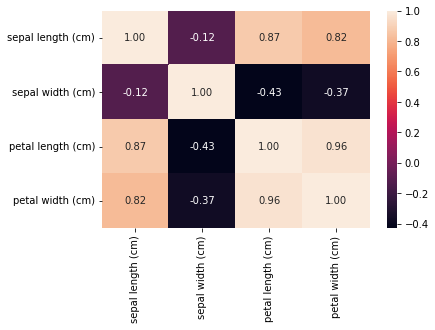

In [496]:
#relationships analysis
#fig, axe = plt.subplots()
#fig.set_size_inches(11,7)
sns.heatmap(df.corr(),fmt='.2f', annot=True )

Observation: There is a strong positive linear relation between pental length and petal width

- There is a negative linear relation between sepal width and sepal length.

In [587]:
dfnew =pd.DataFrame({
   'sepal length (cm)':iris_data.data[:,0],
   'sepal width (cm)':iris_data.data[:,1],
   'petal length (cm)':iris_data.data[:,2],
   'petal width (cm)':iris_data.data[:,3],
  'target':iris_data.target
})
dfnew

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


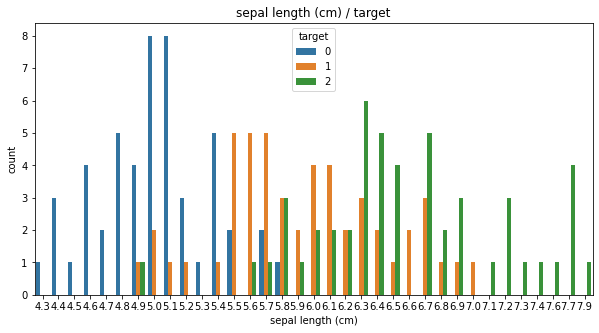

In [588]:
# Visualize insulin level and race

plt.figure(figsize=(10, 5))
sns.countplot(x='sepal length (cm)', data=dfnew, hue='target')
plt.title('sepal length (cm) / target')
plt.show()

# ML - Model Building

## Algorithm # 1 - Logistic Regression

## Scenario 1: Build a model using Sepal Attributes only

*   sepal length (cm)
*   sepal width (cm) *italicized text*



In [497]:
# hint
X= pd.DataFrame(iris_data.data[:,:2])
X.shape




(150, 2)

In [498]:
features = ['sepal length (cm)','sepal width (cm)']
X.columns = features
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [499]:

y=iris_data.target
y.shape
 

(150,)

In [500]:
#split the data into train and test sets and view the different shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(112, 2) (38, 2) (112,) (38,)


In [501]:
#import LogisticRegression function
from sklearn.linear_model import LogisticRegression
lgRg = LogisticRegression()

In [502]:
# fit the logistic regression to the training model
lgRg.fit(x_train,y_train)

LogisticRegression()

In [503]:
#use the fitted model to make predictions on the test data 
y_pred = lgRg.predict(x_test)
y_pred[0:10]

array([2, 1, 1, 2, 0, 1, 0, 2, 0, 2])

In [504]:
y_test[0:10]

array([1, 2, 1, 2, 0, 1, 0, 2, 0, 2])

In [505]:
#print the score of the model
lgRg.score(x_test,y_test)

0.7368421052631579

In [506]:
#print the accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7368421052631579

In [507]:
# Import confusion_matrix from sklearn's metrics module and print the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 11,  6],
       [ 0,  4,  6]])

In [508]:
# Print the report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.65      0.69        17
           2       0.50      0.60      0.55        10

    accuracy                           0.74        38
   macro avg       0.74      0.75      0.74        38
weighted avg       0.75      0.74      0.74        38



Text(33.0, 0.5, 'Actual Values')

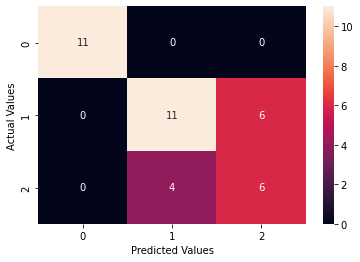

In [509]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

Observatoion: 

## Scenario 2: Build a model using Petal Attributes only

*   petal length (cm)
*   petal width (cm)

In [510]:
# hint
X= iris_data.data[:,2:]
X.shape


(150, 2)

In [511]:
X= pd.DataFrame(iris_data.data[:,2:])
X.head()

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [512]:
 y=iris_data.target
 y.shape

(150,)

In [513]:
#split the data into train and test sets and view the different shape
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test= train_test_split(X,y)
print(x1_train.shape,x1_test.shape, y_train.shape,y_test.shape)

(112, 2) (38, 2) (112,) (38,)


In [514]:
lgRg_2 = LogisticRegression()
lgRg_2.fit(x1_train,y_train)

LogisticRegression()

In [515]:
y_pred = lgRg_2.predict(x1_test)
y_test[0:10]

array([1, 2, 2, 2, 1, 0, 2, 0, 2, 1])

In [516]:
y_pred[0:10]

array([1, 2, 2, 2, 1, 0, 2, 0, 2, 1])

In [517]:
#print the score of the model
lgRg_2.score(x1_test,y_test)

0.9473684210526315

In [518]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [519]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 11]])

Text(33.0, 0.5, 'Actual Values')

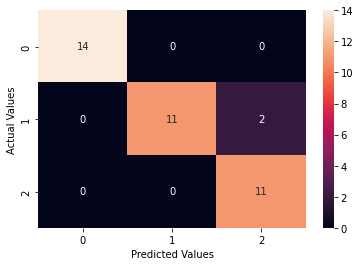

In [520]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [521]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.85      0.92        13
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



Observation:

## Scenario 3: Build a model using Sepal and Petal Attributes (all attributes)

*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)

In [522]:
X= iris_data.data
X.shape

(150, 4)

In [523]:
x2_train, x2_test, y_train, y_test= train_test_split(X,y)
print(x2_train.shape,x2_test.shape, y_train.shape,y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [524]:
lgRg_3 = LogisticRegression()
lgRg_3.fit(x2_train,y_train)

LogisticRegression()

In [525]:
y_pred = lgRg_3.predict(x2_test)
y_test[0:10]

array([0, 2, 0, 2, 2, 0, 0, 0, 2, 0])

In [526]:
y_pred[0:10]

array([0, 2, 0, 2, 2, 0, 0, 0, 2, 0])

In [527]:
lgRg_3.score(x2_test,y_test)

0.9736842105263158

In [528]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [529]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 17]])

Text(33.0, 0.5, 'Actual Values')

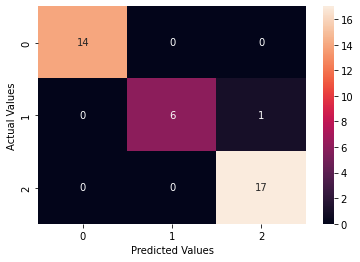

In [530]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [531]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.86      0.92         7
           2       0.94      1.00      0.97        17

    accuracy                           0.97        38
   macro avg       0.98      0.95      0.96        38
weighted avg       0.98      0.97      0.97        38



Observation:

## Algorithm # 2 - KNN (K Nearest Neibhors)

## Scenario 1: Build a model using Sepal Attributes only

*   sepal length (cm)
*   sepal width (cm)

In [532]:
X= pd.DataFrame(iris_data.data[:,:2])
X.shape

(150, 2)

In [533]:
# Using StandardScaler library to standardize and normalize the data
from sklearn.preprocessing import StandardScaler
# define scaler
scalar = StandardScaler()

In [534]:
# fit X using scalar variable
scalar.fit(X)

StandardScaler()

In [535]:
scaled_features = scalar.transform(X)
std_data = pd.DataFrame(scaled_features,columns=X.columns)
std_data.head()

,0,1
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201


In [536]:
#fitting the model
#from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [537]:
# Import KNeighborsClassifier frrom sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

In [538]:
# Fit the KNeighborsClassifier to the training data
knn.fit(x1_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [539]:
# Use the fitted model to make predictions on the test data
y_predict = knn.predict(x1_test)

In [540]:
# Actual test values 
y_test[0:10]

array([0, 1, 2, 2, 1, 0, 1, 1, 2, 1])

In [541]:
#print the score of the model
knn.score(x1_test,y_test)

0.7631578947368421

In [542]:
# Fit the test labels and predictions into confusion_matrix
#from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_predict)

array([[15,  0,  0],
       [ 0,  5,  5],
       [ 0,  4,  9]])

In [543]:
#from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7631578947368421

Text(33.0, 0.5, 'Actual Values')

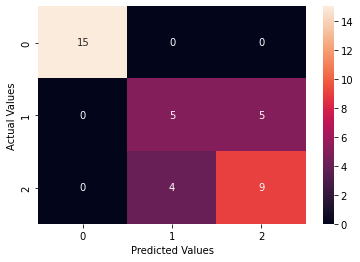

In [544]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [545]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.50      0.53        10
           2       0.64      0.69      0.67        13

    accuracy                           0.76        38
   macro avg       0.73      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38



In [546]:
#KNN value and Accuracy
from sklearn import metrics
score = []


In [547]:
# Calculate score for K values between 1 and 25
for i in range(1,25):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x1_train,y_train)
  y_predict = knn.predict(x1_test)
  score.append(metrics.accuracy_score(y_test,y_predict))

In [548]:
#Calculate error rate for K values between 1 and 25
import numpy as np
error_rate = []
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x1_train,y_train)
  pred_i = knn.predict(x1_test)
  error_rate.append(np.mean(pred_i !=y_test))


Text(0, 0.5, 'Error rate')

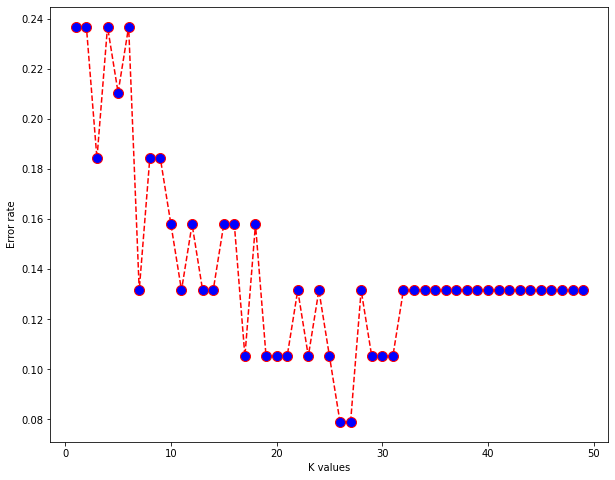

In [549]:
#plot k value vs mean error to visualize the relationship between error rate and k value
plt.figure(figsize=(10,8))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize =10)
plt.xlabel('K values')
plt.ylabel('Error rate')

## Scenario 2: Build a model using Petal Attributes only

*   petal length (cm)
*   petal width (cm)

In [550]:
X= pd.DataFrame(iris_data.data[:,2:])
X.shape

(150, 2)

In [551]:
scalar = StandardScaler()

In [552]:
# fit X using scalar variable
scalar.fit(X)

StandardScaler()

In [553]:
scaled_features = scalar.transform(X)
std_data = pd.DataFrame(scaled_features,columns=X.columns)
std_data.head()

,0,1
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


In [554]:
#fitting the model
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [555]:
from sklearn.neighbors import KNeighborsClassifier 
knn1 = KNeighborsClassifier(n_neighbors=1)

In [556]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [557]:
# Use the fitted model to make predictions on the test data
y_predict = knn1.predict(x_test)
# Actual test values 
y_test[0:10]

array([2, 1, 1, 0, 2, 1, 1, 1, 0, 0])

In [558]:
#print the score of the model
knn1.score(x_test,y_test)

0.9473684210526315

In [559]:
# Fit the test labels and predictions into confusion_matrix
#from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 11]])

In [560]:
#from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9473684210526315

Text(33.0, 0.5, 'Actual Values')

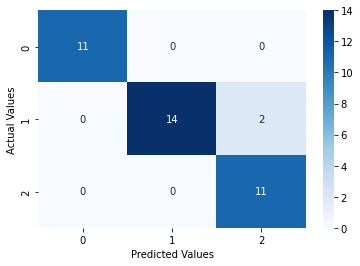

In [561]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='.0f', cmap = 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [562]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93        16
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



In [563]:

score = []


In [564]:
# Calculate score for K values between 1 and 25
for i in range(1,25):
  knn1= KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train,y_train)
  y_predict = knn1.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_predict))

In [565]:

error_rate = []
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))


Text(0, 0.5, 'Error rate')

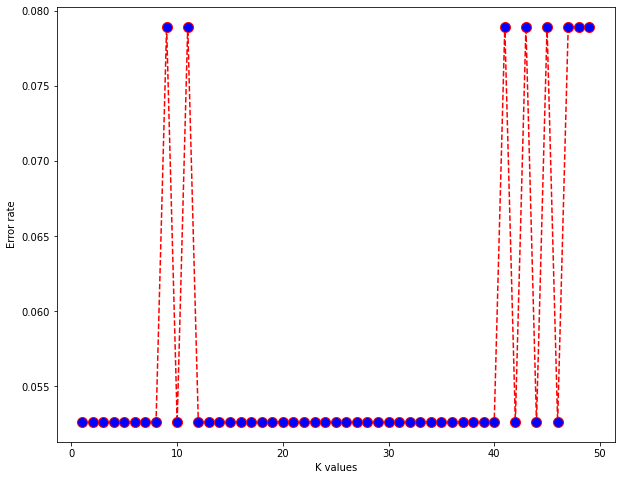

In [566]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize =10)
plt.xlabel('K values')
plt.ylabel('Error rate')

## Scenario 3: Build a model using Sepal and Petal Attributes (all attributes)

*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)

In [567]:
X= pd.DataFrame(iris_data.data)
X.shape

(150, 4)

In [568]:
scalar = StandardScaler()

In [569]:
scalar.fit(X)

StandardScaler()

In [570]:

x_train, x_test, y_train, y_test = train_test_split(X,y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [571]:
 
knn = KNeighborsClassifier(n_neighbors=1)

In [572]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [573]:
# Use the fitted model to make predictions on the test data
y_predict = knn.predict(x_test)
# Actual test values 
y_test[0:10]

array([1, 1, 2, 0, 0, 2, 2, 1, 1, 1])

In [574]:
#print the score of the model
knn.score(x_test,y_test)

0.9210526315789473

In [575]:
# Fit the test labels and predictions into confusion_matrix
#from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_predict)

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  3, 10]])

In [576]:
#from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9210526315789473

Text(33.0, 0.5, 'Actual Values')

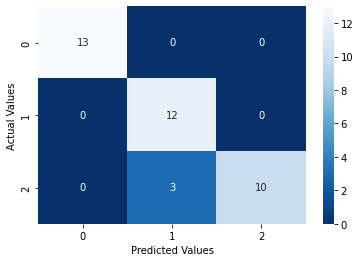

In [577]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='.0f', cmap = 'Blues_r')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [578]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89        12
           2       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



In [579]:

score = []


In [580]:
# Calculate score for K values between 1 and 25
for i in range(1,25):
  knn1= KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train,y_train)
  y_predict = knn1.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_predict))

In [581]:

error_rate = []
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))


Text(0, 0.5, 'Error rate')

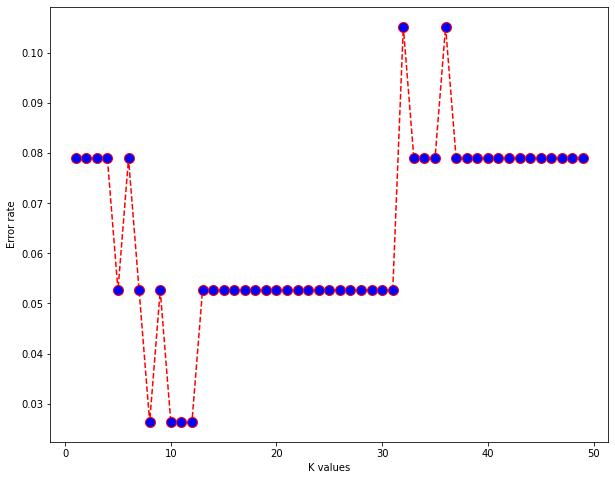

In [582]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize =10)
plt.xlabel('K values')
plt.ylabel('Error rate')

# Bonus Points: Decision Tree

## Build decision tree for Scenario 2


In [583]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus, graphviz
from sklearn import tree
from IPython.display import Image

In [584]:
# hint
# choose decision tree max depth=2
# X= iris_data.data[:,2:]
# y=iris_data.target
# dot_img = tree.export_graphviz(dt_clf,out_file='iris_tree.dot',feature_names=iris_data.feature_names[2:],class_names=iris_data.target_names,filled=True,rounded=True)
# tree_graph = pydotplus.graph_from_dot_file('iris_tree.dot')
# Image(tree_graph.create_png())

Print Decision Tree and write your interpretation for it

# Model Comparison

- Logistic regression model has  score on f1-score .74 and on scenario 1, .95 on scenario 2 and .97 on scenario 3. 
- Logistic model better prediction at 97% when all the features are used. 
 
- KNN model has an accuracy score of .76 with a minimum error rate at k = 26 in scenario 1. 
- KNN model has an accuracy score of .95 with a minimum error rate at k = 1 in scenario 2. 
- KNN model has an accuracy score of .92 with a minimum error rate at k = 9 in scenario 3. 
.
- KNN model makes better prediction in scenario 2 with a lower minimum rate a k = 1.



# Model Selection

From the above, Logistic regression score better that KNN. So, I select Logistic regression.

# Summary and Conclusion


From the above, all models in different scenario have similar results. But Logistic Regression is the most efficient approach.